# Titanic Survival Prediction
Exploratory Data Analysis on the Titanic dataset

In [1]:
# import libraries and datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
print("Shape:\n", train.shape)
print("Data Types:\n", train.dtypes)
print("Is Null:\n", train.isnull().sum())
train.describe()

Shape:
 (891, 15)
Data Types:
 PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
MaritalStatus      object
IsDoctor           object
AgeGroup         category
dtype: object
Is Null:
 PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
MaritalStatus      0
IsDoctor           0
AgeGroup           0
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Calculate survival rate
This calculates number of survivors, and survival rate of Ticket Class, Sex, # of siblings, # of parents, and embark location

### Insights
Ticket class significantly correlates with survival rate signifying first and second class had priority over third class.
Sex also significantly correlates with survival rate with women having much higher survival rate than men.
Number of siblings slightly correlates with the survival rate, with people with 1-2 siblings having the highest survival rate.
Number of parents also correlates with survival rate, children with 0 parents (traveling with nannies) had significantly lower survival rate than those traveling with parents.
Embark location slightly correlates with survival rate. Passengers embarking from Cherbourg (C) had the highest survival rate, while those embarking from Southampton (S) had the lowest.


In [4]:
# --- Ticket Class Analysis ---
print("=== Ticket Class Analysis ===")
print("Passenger count by ticket class:")
print(train['Pclass'].value_counts().sort_index(), "\n")

print("Total survivors by ticket class:")
print(train.groupby("Pclass")["Survived"].sum().sort_index(), "\n")

print("Survival rate by ticket class:")
print(train.groupby("Pclass")["Survived"].sum() / train['Pclass'].value_counts(), "\n")

# --- Sex Analysis ---
print("=== Sex Analysis ===")
print("Passenger count by sex:")
print(train['Sex'].value_counts(), "\n")

print("Total survivors by sex:")
print(train.groupby("Sex")["Survived"].sum(), "\n")

print("Survival rate by sex:")
print(train.groupby("Sex")["Survived"].sum() / train['Sex'].value_counts(), "\n")

# --- SibSp Analysis ---
print("=== SibSp (Siblings/Spouses Aboard) Analysis ===")
print("Passenger count by SibSp:")
print(train['SibSp'].value_counts().sort_index(), "\n")

print("Total survivors by SibSp:")
print(train.groupby("SibSp")["Survived"].sum().sort_index(), "\n")

print("Survival rate by SibSp:")
print(train.groupby("SibSp")["Survived"].sum() / train['SibSp'].value_counts().sort_index(), "\n")

# --- Parch Analysis ---
print("=== Parch (Parents/Children Aboard) Analysis ===")
print("Passenger count by Parch:")
print(train['Parch'].value_counts().sort_index(), "\n")

print("Total survivors by Parch:")
print(train.groupby("Parch")["Survived"].sum().sort_index(), "\n")

print("Survival rate by Parch:")
print(train.groupby("Parch")["Survived"].sum() / train['Parch'].value_counts().sort_index(), "\n")

# --- Embarked Analysis ---
print("=== Embarked Analysis ===")
print("Passenger count by embarkation port:")
print(train['Embarked'].value_counts(), "\n")

print("Total survivors by embarkation port:")
print(train.groupby("Embarked")["Survived"].sum(), "\n")

print("Survival rate by embarkation port:")
print(train.groupby("Embarked")["Survived"].sum() / train['Embarked'].value_counts())


=== Ticket Class Analysis ===
Passenger count by ticket class:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64 

Total survivors by ticket class:
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64 

Survival rate by ticket class:
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64 

=== Sex Analysis ===
Passenger count by sex:
Sex
male      577
female    314
Name: count, dtype: int64 

Total survivors by sex:
Sex
female    233
male      109
Name: Survived, dtype: int64 

Survival rate by sex:
Sex
female    0.742038
male      0.188908
dtype: float64 

=== SibSp (Siblings/Spouses Aboard) Analysis ===
Passenger count by SibSp:
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64 

Total survivors by SibSp:
SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64 

Survival rate by SibSp:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.00

## Calculate survival rate by Marital Status and Doctors
This creates categories for marital status and if the passenger is a doctor using their name, then calculates survival rate for each.

### Insights
Marital status is identifiable only for women (using “Mrs.” for married and “Miss” for unmarried). Both married and unmarried women have high survival rates, with married women showing a slightly higher rate. Passengers identified as doctors have a significantly higher survival rate compared to non-doctors. However, the sample size is small (only 6 doctors), so this finding should be interpreted with caution.

In [5]:
def classify_marital_status(name):
    if 'Mrs' in name:
        return 'Married'
    elif 'Miss' in name:
        return 'Unmarried'
    else:
        return 'Unknown'

def is_doctor(name):
    if 'Dr' in name:
        return 'Yes'
    else:
        return 'No'

data = train
data['MaritalStatus'] = data['Name'].apply(classify_marital_status)
marriedSurvived = data.groupby('MaritalStatus')

data['IsDoctor'] = data['Name'].apply(is_doctor)
DoctorSurvived = data.groupby('IsDoctor')

# --- MaritalStatus Analysis ---
print("=== MaritalStatus Analysis ===")
print("Passenger count by Marital Status:")
print(data['MaritalStatus'].value_counts(), "\n")

print("Total Survivors by Marital Status:")
print(marriedSurvived['Survived'].sum(), "\n")

print("Survival rate by Marital Status:")
print(marriedSurvived['Survived'].sum()/data['MaritalStatus'].value_counts(), "\n")

# --- Doctor Analysis ---
print("=== Doctor Analysis ===")
print("Passenger count by Doctors:")
print(data['IsDoctor'].value_counts(), "\n")

print("Total Survivors by Doctors:")
print(DoctorSurvived['Survived'].sum(), "\n")

print("Passenger Rate by Doctors:")
print(DoctorSurvived['Survived'].sum()/data['IsDoctor'].value_counts())


=== MaritalStatus Analysis ===
Passenger count by Marital Status:
MaritalStatus
Unknown      582
Unmarried    180
Married      129
Name: count, dtype: int64 

Total Survivors by Marital Status:
MaritalStatus
Married      102
Unknown      114
Unmarried    126
Name: Survived, dtype: int64 

Survival rate by Marital Status:
MaritalStatus
Married      0.790698
Unknown      0.195876
Unmarried    0.700000
dtype: float64 

=== Doctor Analysis ===
Passenger count by Doctors:
IsDoctor
No     880
Yes     11
Name: count, dtype: int64 

Total Survivors by Doctors:
IsDoctor
No     336
Yes      6
Name: Survived, dtype: int64 

Passenger Rate by Doctors:
IsDoctor
No     0.381818
Yes    0.545455
dtype: float64


## Calculate survival rate by age group

Fills in missing age values, then bin the ages into decades.
After that, computes the survival rate for each group.
Prints number of people in each age group and plots their survival rate.

### Insights
Children under the age of 10 had the highest survival rate

AgeGroup
0s      62
10s    102
20s    397
30s    167
40s     89
50s     48
60s     19
70s      6
80s      1
90s      0
Name: count, dtype: int64


C:\Users\izaak\AppData\Local\Temp\ipykernel_15396\3262811735.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = train.groupby('AgeGroup')['Survived'].agg(['sum', 'count'])


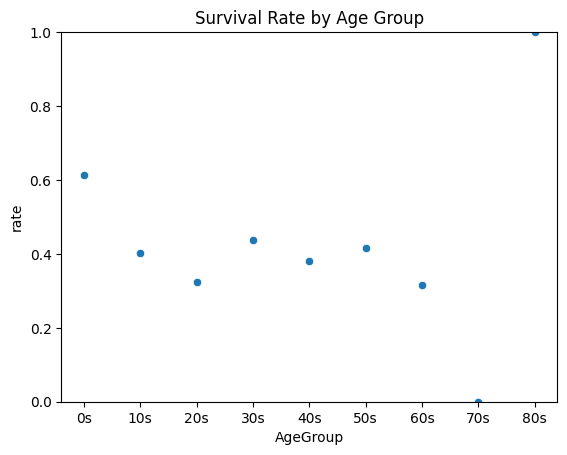

In [6]:
# Fill missing ages with average
average_age = int(train['Age'].dropna().mean())
train['Age'] = train['Age'].fillna(average_age)

# Bin ages
bins = range(0, 110, 10)
labels = ["0s", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"]
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and calculate survival rate
grouped = train.groupby('AgeGroup')['Survived'].agg(['sum', 'count'])
grouped['rate'] = grouped['sum'] / grouped['count']

print(train['AgeGroup'].value_counts().sort_index())

# Plot
sns.scatterplot(data=grouped.reset_index(), x='AgeGroup', y='rate')
plt.ylim(0, 1)  # Optional: survival rate is between 0 and 1
plt.title('Survival Rate by Age Group')
plt.show()

Min Fare: 0.0
Max Fare: 512.33
Average Fare: 32.2


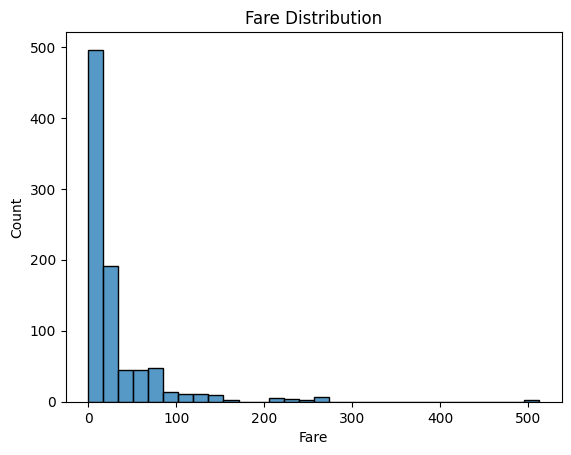

In [26]:
print("Min Fare:", train['Fare'].min())
print("Max Fare:", round(train['Fare'].max(), 2))
print("Average Fare:", round(train['Fare'].mean(), 2))

sns.histplot(train['Fare'], bins=30)
plt.title('Fare Distribution')
plt.show()